Chapter 11 Exercises

In [1]:
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd
from ISLP.models import ModelSpec as MS
from ISLP import load_data

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test
from ISLP.survival import sim_time

print('Done')

Done


In [2]:
BrainCancer = load_data('BrainCancer')
BrainCancer

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30
...,...,...,...,...,...,...,...,...
83,Male,HG glioma,Supratentorial,80,0.16,SRT,1,20.69
84,Male,HG glioma,Supratentorial,80,19.81,SRT,1,6.39
85,Male,Meningioma,Supratentorial,90,2.50,SRT,0,32.82
86,Male,Meningioma,Supratentorial,90,2.02,SRS,0,42.07


10

A

<AxesSubplot: xlabel='timeline'>

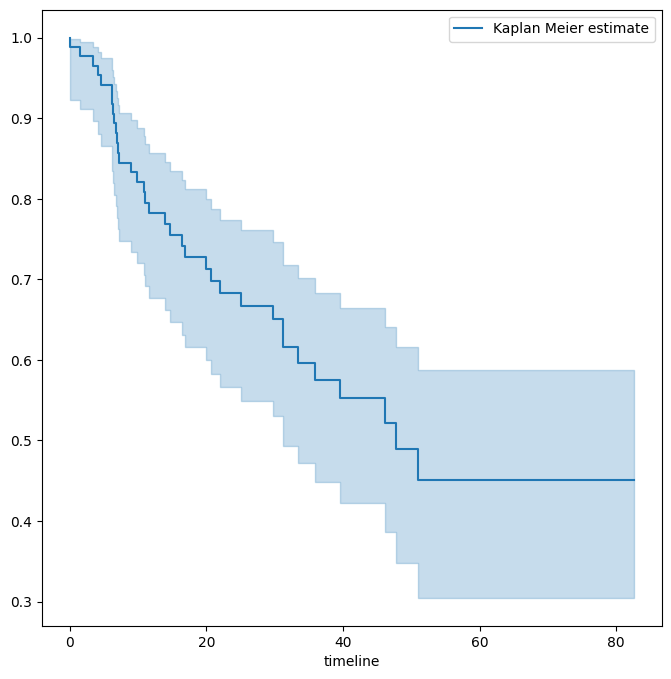

In [5]:
fig, ax = subplots(figsize=(8,8))
km = KaplanMeierFitter()
km_brain = km.fit(BrainCancer['time'], BrainCancer['status'])
km_brain.plot(label='Kaplan Meier estimate', ax=ax)

C

In [14]:
coxph = CoxPHFitter
cleaned = BrainCancer.dropna()
all_MS = MS(cleaned.columns, intercept=False)
all_df = all_MS.fit_transform(cleaned)
fit_all = coxph().fit(all_df,'time','status')
fit_all.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
sex[Male],0.183748,0.360358,0.610119
diagnosis[LG glioma],-1.239530,0.579555,0.032455
diagnosis[Meningioma],-2.154566,0.450524,0.000002
diagnosis[Other],-1.268870,0.617672,0.039949
loc[Supratentorial],0.441195,0.703669,0.530665
ki,-0.054955,0.018314,0.002693
gtv,0.034293,0.022333,0.124661
stereo[SRT],0.177778,0.601578,0.767597


The diagnoses as well as the ki are the only features that are statisticaly significant at a 5% level, as shown by their p-values.

D

In [8]:
levels = cleaned['ki'].unique()
def representative(series):
    if hasattr(series.dtype, 'categories'):
        return pd.Series.mode(series)
    else:
        return series.mean()
modal_data = cleaned.apply(representative, axis=0)

In [9]:
modal_df = pd.DataFrame(
              [modal_data.iloc[0] for _ in range(len(levels))])
modal_df['ki'] = levels
modal_df

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Supratentorial,90,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,70,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,80,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,100,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,60,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,40,8.687011,SRT,0.402299,27.188621


In [10]:
modal_X = all_MS.transform(modal_df)
modal_X.index = levels
modal_X

,sex[Male],diagnosis[LG glioma],diagnosis[Meningioma],diagnosis[Other],loc[Supratentorial],ki,gtv,stereo[SRT],status,time
90,0.0,0.0,1.0,0.0,1.0,90,8.687011,1.0,0.402299,27.188621
70,0.0,0.0,1.0,0.0,1.0,70,8.687011,1.0,0.402299,27.188621
80,0.0,0.0,1.0,0.0,1.0,80,8.687011,1.0,0.402299,27.188621
100,0.0,0.0,1.0,0.0,1.0,100,8.687011,1.0,0.402299,27.188621
60,0.0,0.0,1.0,0.0,1.0,60,8.687011,1.0,0.402299,27.188621
40,0.0,0.0,1.0,0.0,1.0,40,8.687011,1.0,0.402299,27.188621


In [11]:
predicted_survival = fit_all.predict_survival_function(modal_X)
predicted_survival

,90,70,80,100,60,40
0.07,0.998753,0.996261,0.997840,0.999280,0.993532,0.980712
1.18,0.998753,0.996261,0.997840,0.999280,0.993532,0.980712
1.41,0.997374,0.992140,0.995455,0.998484,0.986421,0.959795
1.54,0.997374,0.992140,0.995455,0.998484,0.986421,0.959795
2.03,0.997374,0.992140,0.995455,0.998484,0.986421,0.959795
...,...,...,...,...,...,...
65.02,0.797428,0.506907,0.675589,0.877517,0.308173,0.029217
67.38,0.797428,0.506907,0.675589,0.877517,0.308173,0.029217
73.74,0.797428,0.506907,0.675589,0.877517,0.308173,0.029217
78.75,0.797428,0.506907,0.675589,0.877517,0.308173,0.029217


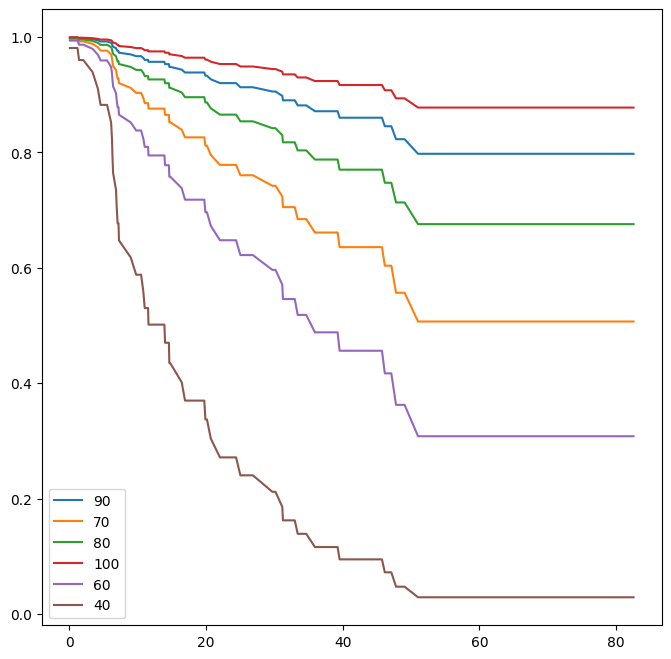

In [12]:
fig, ax = subplots(figsize=(8, 8))
predicted_survival.plot(ax=ax);